In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kurtosis, skew, ttest_ind, ttest_ind_from_stats
from collections import Counter
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [35]:
df = pd.read_csv('case_study.csv', index_col=0)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


In [37]:
df['DIABETE3'].unique()

array([3., 1., 4., 7., 2., 9.])

In [38]:
zero_dict = {1.:"Yes", 
            2.: "Yes",
            3.: "No",
            4.: "No",
            7.: "No",
            9.: np.nan}
df['DIABETE3'] = df['DIABETE3'].replace(zero_dict)
diabetes = df['DIABETE3'].dropna()

In [39]:
diabetes.unique()

array(['No', 'Yes'], dtype=object)

In [40]:
diabetes.dropna()

49938     No
49939     No
49940     No
49941     No
49942     No
          ..
303774    No
303775    No
303776    No
303777    No
303778    No
Name: DIABETE3, Length: 34513, dtype: object

In [41]:
replace_dict = {
            7777: np.nan,
            9999: np.nan,
            }
def clean_to_lb(x):
    if (x >= 9000) :
        return(x % 1000) * 2.20462
    return x
df['WEIGHT2'] = df['WEIGHT2'].replace(replace_dict)
df['WEIGHT2'] = df['WEIGHT2'].apply(lambda x : clean_to_lb(x))
def clean_to_lb(x):
    if (x >= 9000) :
        return(x % 1000) * 2.20462
    return x

In [42]:
weight = df['WEIGHT2'].dropna()

In [43]:
means = df.groupby('DIABETE3')['WEIGHT2'].mean()
diabetes = ['Yes', 'No']

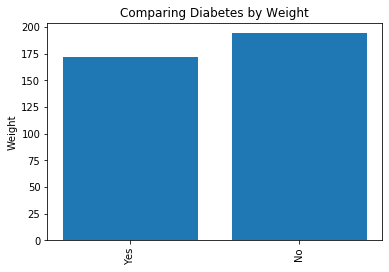

In [44]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(diabetes, means)

# Set title and lables
ax.set_xticklabels(['Yes', 'No'], rotation=90)
ax.set_ylabel("Weight")
ax.set_title('Comparing Diabetes by Weight')

plt.show()

Skewness = 1.2071615515973573
kurtosis = 3.9137153284883937


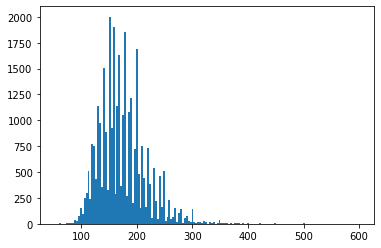

In [45]:
plt.hist(weight, bins='auto')
print ('Skewness =', skew(weight))
print ('kurtosis =', kurtosis(weight))

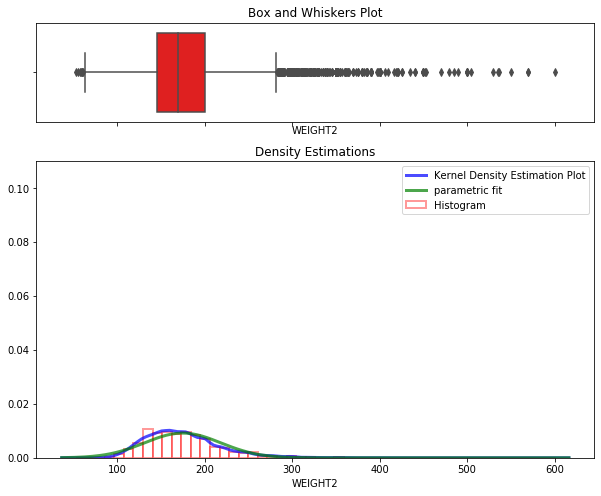

In [46]:
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize = (10,8) )

sns.distplot(df.WEIGHT2.dropna(), 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=df.WEIGHT2, ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, .08))
plt.ylim(0,0.11)
plt.legend();

In [47]:
sampleM = df['WEIGHT2'].mean()
sampleStd = df['WEIGHT2'].std()
z = 1.96
def conf_interval(sample):
    sample_size = len(df['WEIGHT2'])
    moe = z * (sampleM/sampleStd)
    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = (sampleM - moe, sampleM + moe)
    
    return z, moe, conf

# Call above function with sample
z_critical, margin_of_error, confidence_interval = conf_interval(df['WEIGHT2'])
    

print("Z value:")              
print(z_critical)         
print ('\nMargin of error')
print(margin_of_error)
print("\nConfidence interval:")
print(confidence_interval)

Z value:
1.96

Margin of error
7.884067674174836

Confidence interval:
(166.97726295508593, 182.74539830343562)


In [48]:
no_count = df['DIABETE3'].value_counts()['No']
ttl = df['DIABETE3'].count()
no_prob = no_count / ttl
yes_prob = 1 - no_prob
interval = (no_prob - 1.96 * ((no_prob * yes_prob ) / ttl ) ** (1/2), 
            no_prob + 1.96 * ((no_prob * yes_prob ) / ttl ) ** (1/2)
           )

In [49]:
interval

(0.8628966157740837, 0.8700735693735419)

In [50]:
def clean_week(x) :
    if (x < 100):
        return round(x, 2)
    elif (x < 200):
        return round((x % 100), 2)
    elif (x < 300):
        return round((x % 100) / 7, 2)
    elif (x == 300):
        return 0
    elif (x < 400):
        return round((x % 100) / 12, 2)
    elif (x == 555):
        return 0
    else:
        return x
def impossibru(x):
    if ( x > 5):
        return 0
    else:
        return x
df['FRUITJU2-week'] = df['FRUITJU2'].apply(lambda x : clean_week(x))
df['FRUITJU2-week-1'] = df['FRUITJU2-week'].replace(to_replace=0.00, value=np.nan)
df['FRUITJU2-week-1-5'] = df['FRUITJU2-week-1'].apply(lambda x : impossibru(x))
df['FRUITJU2-100'] = df['FRUITJU2-week-1-5'].apply(lambda x: x * 100)

In [51]:
fruit = df['FRUITJU2-100'].dropna()
fruit

49938      29.0
49939      29.0
49943     100.0
49945     167.0
49946      83.0
          ...  
303770     43.0
303774    100.0
303775    100.0
303777      0.0
303778     57.0
Name: FRUITJU2-100, Length: 18360, dtype: float64

In [52]:
mjuice = fruit.mean()
stdjuice = fruit.std()
njuice = fruit.count()
wmean = weight.mean()
wstd = weight.std()
nweight = weight.count()
statistic, pvalue = stats.ttest_ind_from_stats(wmean, wstd, nweight, mjuice, stdjuice, njuice)
(statistic, pvalue)

(210.94010602012958, 0.0)

In [53]:
zero_dict = {1.:"White", 
            2.: "Black",
            3.: "Asian",
            4.: "Native",
            5.: "Hispanic",
            6.: "Other"}

df['_IMPRACE'] = df['_IMPRACE'].replace(zero_dict)
race = df['_IMPRACE'].dropna()

In [54]:
race.unique()

array(['White', 'Asian', 'Hispanic', 'Black', 'Other', 'Native'],
      dtype=object)

In [55]:
race

49938        White
49939        White
49940        Asian
49941        White
49942        White
            ...   
303774    Hispanic
303775    Hispanic
303776    Hispanic
303777    Hispanic
303778    Hispanic
Name: _IMPRACE, Length: 34545, dtype: object

In [56]:
white_count = race.value_counts()['White']
white_count
ttl_white_count = race.count()
white_prob = white_count / ttl
white_prob
yes_prob

0.1335149074261872

In [57]:
p1 = yes_prob
p2 = white_prob
n1 = ttl_white_count
n2 = df['DIABETE3'].count()
p_hat = (white_count + df['DIABETE3'].value_counts()['Yes']) / (df['_IMPRACE'].count() + df['DIABETE3'].count())
numerator = p1 - p2
prob_of_hats = (p_hat * (1 - p_hat))
fracts = (1 / n1) + (1/n2)
sqrt = (prob_of_hats * fracts) ** (1/2)
z = numerator / sqrt
z

-156.84895080796267

In [58]:
race.value_counts()

White       24997
Hispanic     4084
Black        3323
Asian        1216
Other         713
Native        212
Name: _IMPRACE, dtype: int64

In [59]:
table  = [[1074, 2682, 3479, 170, 611, 21889], [142, 639, 604, 42, 101, 3080]]


In [60]:
stat, p, dof, expected = chi2_contingency(table)
#weighted_yeses
print('dof=%d' % dof)
print(expected)
prob1 = .95
critical = chi2.ppf(prob1, dof)
#critical
print('H0 = You\'r race does not affect having diabetes')
print('probability=%.3f, critical=%.3f, stat=%.3f' %(prob1, critical, stat))
if (abs(stat) >= critical):
    print('dependent (reject H0)')
else:
    print('independent (fail to reject H0)')
    
    from statsmodels.formula.api import ols
import statsmodels.api as sm
anova_season = ols('WEIGHT2~_IMPRACE', data=df).fit()
anova_table = sm.stats.anova_lm(anova_season, type=2)
print(anova_table)
df['WEIGHT2'].dropna(inplace=True)

dof=5
[[ 1053.64587257  2877.59699244  3537.85863298   183.69483963
    616.93738591 21635.26627648]
 [  162.35412743   443.40300756   545.14136702    28.30516037
     95.06261409  3333.73372352]]
H0 = You'r race does not affect having diabetes
probability=0.950, critical=11.070, stat=140.220
dependent (reject H0)
               df        sum_sq        mean_sq           F         PR(>F)
_IMPRACE      5.0  1.068653e+06  213730.563223  115.128973  4.710065e-121
Residual  31825.0  5.908135e+07    1856.444620         NaN            NaN


In [61]:
statfway, pvaluefway = stats.f_oneway(df['WEIGHT2'][df['_IMPRACE'] == 'White'],
              df['WEIGHT2'][df['_IMPRACE'] == 'Black'],
               df['WEIGHT2'][df['_IMPRACE'] == 'Asian'],
               df['WEIGHT2'][df['_IMPRACE'] == 'Hispanic'],
               df['WEIGHT2'][df['_IMPRACE'] == 'Other'],
               df['WEIGHT2'][df['_IMPRACE'] == 'Native'])
print('H0 = Race does not affect weight')
print('HA = Race affects weight')
print('PValue = {} :: Failed to reject H0'.format(pvaluefway))


H0 = Race does not affect weight
HA = Race affects weight
PValue = 4.710065356086973e-121 :: Failed to reject H0
